# Introduction to MLPs with Keras

## Dependencies

In [ ]:
!pip install -U pandas
!pip install -U numpy
!pip install -U matplotlib
!pip install -U tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.16.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.9 MB/s eta 0:00:00
  Attempting u

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

#### We will again use the IMDB dataset for sentiment analysis and compare the performance of a linear classifier to a MLP classifier.

## Logistic Regression

In [ ]:
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = tf.keras.datasets.imdb.load_data()

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train_imdb = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train_imdb])
x_test_imdb = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test_imdb])

1641221/1641221 [==============================] - 0s 0us/step


We will use our known binary representations

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# min-df --> when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
binary_vectorizer = CountVectorizer(binary=True, min_df=100)
x_train_imdb_binary = binary_vectorizer.fit_transform(x_train_imdb)
x_test_imdb_binary = binary_vectorizer.transform(x_test_imdb)
print(
    'Vocabulary size:', len(binary_vectorizer.vocabulary_)
)

Vocabulary size: 3834


In [ ]:
type(x_train_imdb_binary[0])

scipy.sparse._csr.csr_matrix

In [ ]:
x_train_imdb_binary = x_train_imdb_binary.toarray()
x_test_imdb_binary = x_test_imdb_binary.toarray()

In [ ]:
type(x_train_imdb_binary[0])

numpy.ndarray

### Logistic regression with Keras

In [ ]:
log_keras = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=1, activation='sigmoid') # single linear layer
])

log_keras.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['binary_accuracy'])  # Keras compile method
log_keras.fit(x=x_train_imdb_binary, y=y_train_imdb,
              epochs=20, verbose=1, batch_size=32)

Epoch 1/20
782/782 [==============================] - 10s 8ms/step - loss: 0.4494 - binary_accuracy: 0.8311
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3128 - binary_accuracy: 0.8862
Epoch 3/20
782/782 [==============================] - 3s 3ms/step - loss: 0.2740 - binary_accuracy: 0.8984
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 0.2529 - binary_accuracy: 0.9079
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2393 - binary_accuracy: 0.9114
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 0.2292 - binary_accuracy: 0.9150
Epoch 7/20
782/782 [==============================] - 3s 3ms/step - loss: 0.2213 - binary_accuracy: 0.9184
Epoch 8/20
782/782 [==============================] - 2s 3ms/step - loss: 0.2152 - binary_accuracy: 0.9212
Epoch 9/20
782/782 [==============================] - 2s 3ms/step - loss: 0.2101 - binary_accuracy: 0.9218
Epoch 10/20
782/782 [===============

In [ ]:
print(log_keras.evaluate(x_test_imdb_binary, y_test_imdb))

782/782 [==============================] - 4s 5ms/step - loss: 0.3249 - binary_accuracy: 0.8712
[0.3249405026435852, 0.8712400197982788]


## MLPs

We can add non-linear hidden layers in order to create an MLP and train it with the binary vectors. Keras provides two distinct APIs for building deep models. The `Sequential` API and the `Functional` API.

We will first use `Sequential`. We can stack layers provided by Keras ***sequentially*** and build an MLP. The example below uses two hidden layers with $32$ neurons and a ReLU activation function.

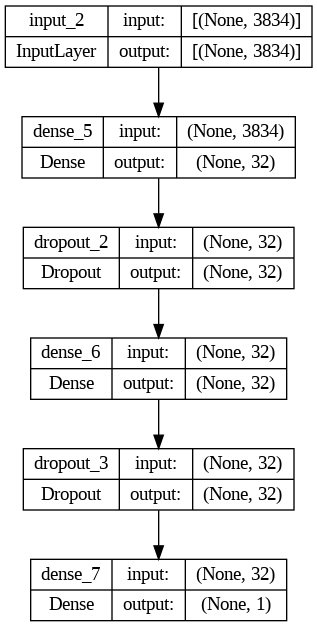

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

imdb_mlp = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(3834,)),  # input layer. size of the input vectors
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=1, activation='sigmoid')  # binary classification
])

plot_model(imdb_mlp, to_file='model.png', show_shapes=True)
Image('model.png')

In [ ]:
imdb_mlp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['binary_accuracy'])
imdb_mlp.fit(x=x_train_imdb_binary, y=y_train_imdb,
             epochs=20, verbose=1, batch_size=32)

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.4456 - binary_accuracy: 0.7910
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2953 - binary_accuracy: 0.8819
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2598 - binary_accuracy: 0.9009
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2261 - binary_accuracy: 0.9126
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2037 - binary_accuracy: 0.9210
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1888 - binary_accuracy: 0.9244
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1763 - binary_accuracy: 0.9297
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1608 - binary_accuracy: 0.9352
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1526 - binary_accuracy: 0.9346
Epoch 10/20
782/782 [================

In [ ]:
print(imdb_mlp.evaluate(x_test_imdb_binary, y_test_imdb))

782/782 [==============================] - 2s 2ms/step - loss: 0.5906 - binary_accuracy: 0.8658
[0.5906456708908081, 0.8658400177955627]


### Image classification experiment with the MNIST dataset using the Keras' Functional API

We will now use the `Functional` API. This API is more flexible and can be used to built more complex models (e.g., with several inputs/outputs etc.). The difference from `Sequential` is that we use the output of a layer as an input to the next one. To do that we use function chaining.

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = x_train_mnist.astype("float32") / 255
x_test_mnist = x_test_mnist.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train_mnist[0].shape)
print(y_train_mnist[0])

(28, 28)
5


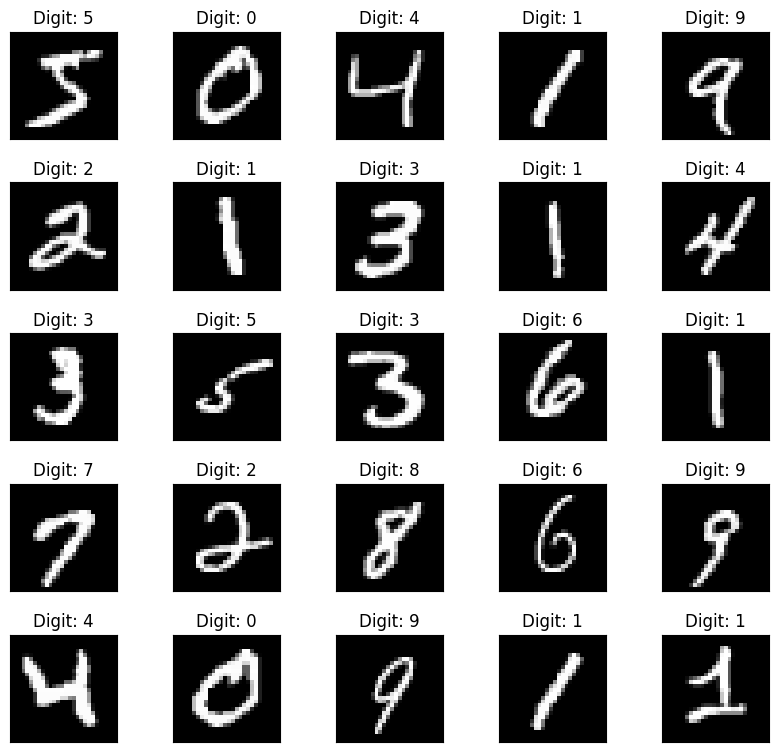

In [ ]:
fig = plt.figure(figsize=(8, 8))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train_mnist[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train_mnist[i]))
  plt.xticks(list())
  plt.yticks(list())

In [ ]:
np.unique(y_train_mnist)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

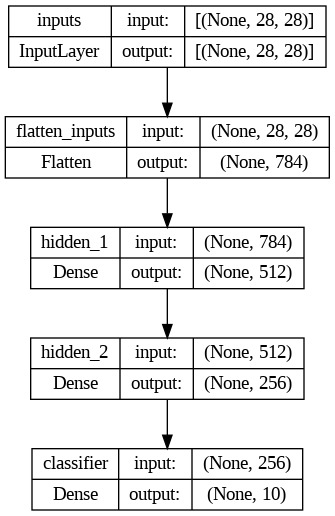

In [ ]:
def get_mnist_mlp(num_classes):
  # Functional: the output of each layer is passed as input to the next layer
  inp = tf.keras.layers.Input(shape=(28, 28), name='inputs')
  x = tf.keras.layers.Flatten(name='flatten_inputs')(inp) # 28 * 28 = 784
  x = tf.keras.layers.Dense(units=512, activation='relu', name='hidden_1')(x)
  x = tf.keras.layers.Dense(units=256, activation='relu', name='hidden_2')(x)
  x = tf.keras.layers.Dense(units=num_classes, activation='softmax',
                            name='classifier')(x)
  return tf.keras.models.Model(inputs=inp, outputs=x, name='mnist_mlp')

mnist_mlp = get_mnist_mlp(len(np.unique(y_train_mnist)))
plot_model(mnist_mlp, to_file='model.png', show_shapes=True)
Image('model.png')

In [ ]:
mnist_mlp.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10,
                                              dtype="int32")
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10,
                                             dtype="int32")
y_train_mnist[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [ ]:
mnist_mlp_history = mnist_mlp.fit(x_train_mnist, y_train_mnist, batch_size=32,
                                  epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2051 - accuracy: 0.9371 - val_loss: 0.1133 - val_accuracy: 0.9642
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0844 - accuracy: 0.9737 - val_loss: 0.0919 - val_accuracy: 0.9717
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9805 - val_loss: 0.0890 - val_accuracy: 0.9758
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0938 - val_accuracy: 0.9759
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0943 - val_accuracy: 0.9739
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0284 - accuracy: 0.9902 - val_loss: 0.0930 - val_accuracy: 0.9772
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.1058 - val_accuracy:

In [ ]:
def plot(his, kind):
  train = his.history[kind]
  val = his.history['val_' + kind]
  epochs = range(1, len(train)+1)
  plt.figure(figsize=(12,9))
  plt.plot(epochs, train, 'b', label='Training ' + kind)
  plt.plot(epochs, val, 'orange', label='Validation ' + kind)
  plt.title('Training and validation ' + kind)
  plt.xlabel('Epochs')
  plt.ylabel(kind)
  # x1, x2, y1, y2 = plt.axis()
  # plt.axis((x1, x2, 0, 0.2))
  plt.legend()
  plt.show()

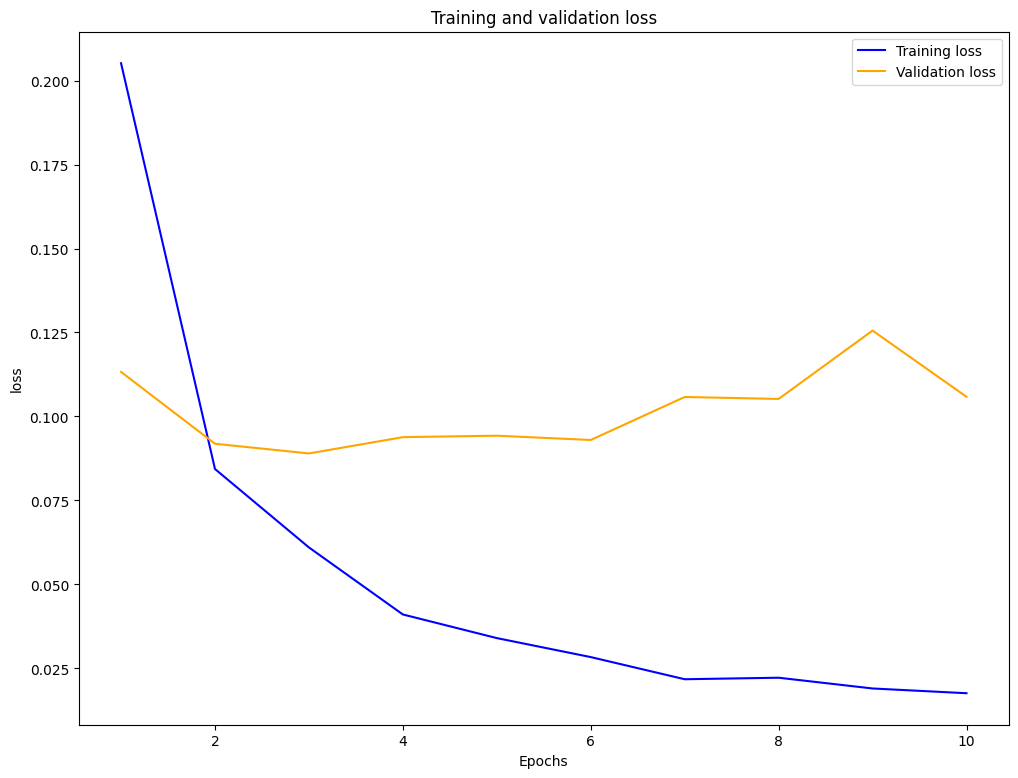

In [ ]:
plot(mnist_mlp_history, 'loss')

In [ ]:
print(mnist_mlp.evaluate(x_test_mnist, y_test_mnist))

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9799
[0.09655075520277023, 0.9799000024795532]


In [ ]:
from sklearn.metrics import classification_report

y_pred_mnist = mnist_mlp.predict(x_test_mnist)
print(y_pred_mnist[0])
y_pred_mnist = np.argmax(y_pred_mnist, axis=-1)
print(y_pred_mnist[0])
y_pred_mnist = tf.keras.utils.to_categorical(y_pred_mnist,
                                             num_classes=10, dtype="int32")
print(y_pred_mnist[0])
# Print evaluation report
print(classification_report(y_test_mnist, y_pred_mnist))

313/313 [==============================] - 1s 3ms/step
[6.7057308e-14 5.0625108e-08 1.0917016e-09 1.3395935e-06 1.1364735e-15
 3.9019218e-12 7.2198593e-19 9.9994314e-01 2.0942079e-09 5.5481076e-05]
7
[0 0 0 0 0 0 0 1 0 0]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.96      0.98      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0

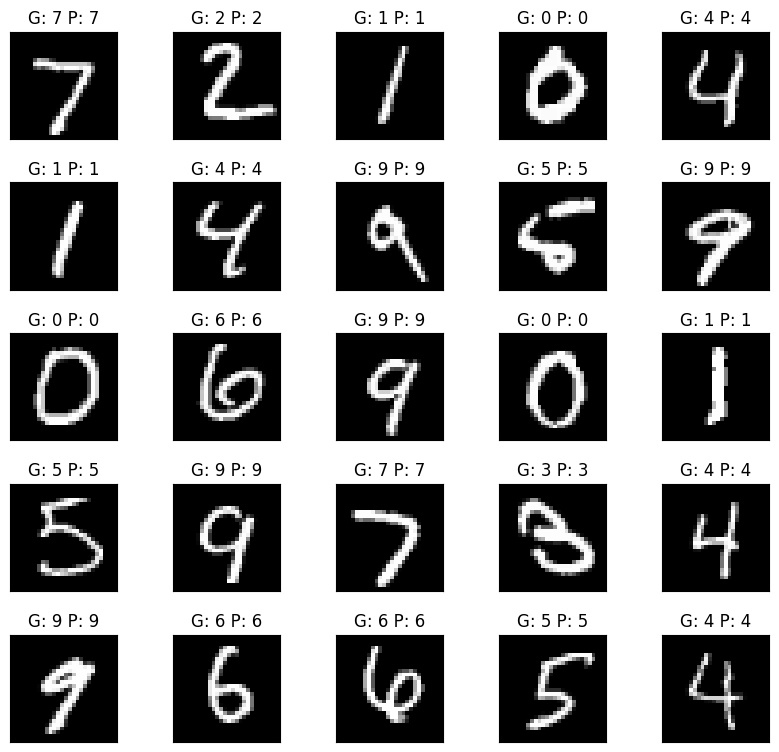

In [ ]:
fig = plt.figure(figsize=(8, 8))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_test_mnist[i], cmap='gray', interpolation='none')
  plt.title(f"G: {np.argmax(y_test_mnist[i])} P: {np.argmax(y_pred_mnist[i])}")
  plt.xticks(list())
  plt.yticks(list())